Enter Twitter user without the '@': DalaiLama


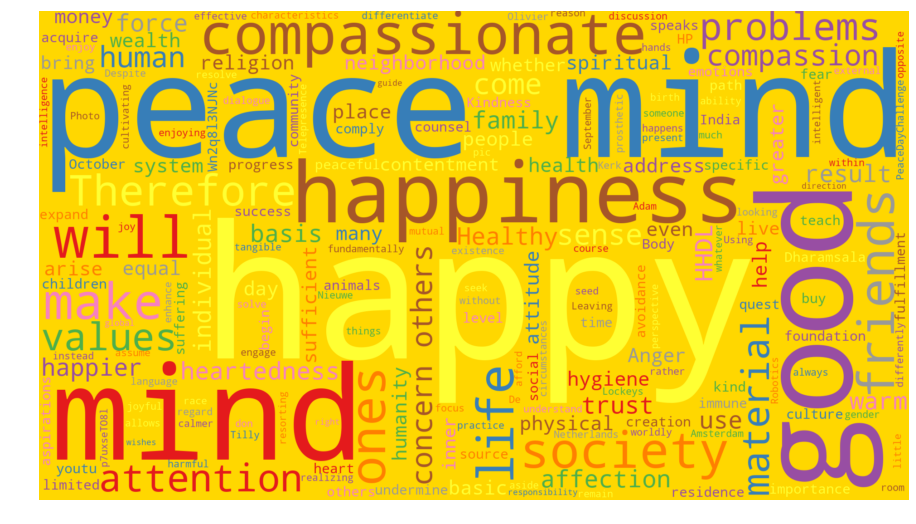

In [1]:
"""
Created on Fri Oct 19 15:07:37 2018

@author: adhamlin
"""

# needed for notebook
%matplotlib inline

# libraries
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

stopwords = set(STOPWORDS)
stopwords.add("twitter")
stopwords.add("http")
stopwords.add("https")
stopwords.add("ly")
stopwords.add("one")
stopwords.add("us")
stopwords.add("need")
stopwords.add("terms")
stopwords.add("pay")
stopwords.add("value")
# ---- * Scrape A Tweet * ----
# choose twitter user
tUser = input("Enter Twitter user without the '@': ")

# Specify url: user name url
url = 'https://twitter.com/' + tUser + '?lang=en'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc, 'html.parser')

# first page load get all div containers with the class js-tweet-text-conta...
containers = soup.findAll('div', attrs={'class': 'js-tweet-text-container'})

post_text = []
# loop through p_containers and capture text only and put in empty "twitts"
for p in containers:
    # get al' <p> tags with the class TweetTextSize...
    p_containers = p.findAll('p', attrs={'class': 'TweetTextSize'})
    postText = p_containers[0].text
    post_text.append(postText)

# First-clean
first_cln = [s.replace('  ', ' ') for s in post_text]
first_cln = [s.replace('...', ' ') for s in first_cln]
first_cln = [s.replace('"', ' ') for s in first_cln]
first_cln = [s.replace("'", "") for s in first_cln]
first_cln = [s.replace('\n', ' ') for s in first_cln]
first_cln = [s.replace('\r', ' ') for s in first_cln]
first_cln = [s.replace('  ', ' ') for s in first_cln]
first_cln = [s.replace('_', ' ') for s in first_cln]
# repeat to remove hash and set single space for split
first_cln = [s.replace('#', ' ') for s in first_cln]
first_cln = [s.replace('  ', ' ') for s in first_cln]


lst_words_lst = []
for wrds in first_cln:
    the_words = wrds.split(" ")
    lst_words_lst.append(the_words)

flat_words_lst = [item for sublist in lst_words_lst for item in sublist]


# clean up text by removing unwanted chars "
cln_words = [s.strip('. ') for s in flat_words_lst]
cln_words = [s.strip('\n') for s in cln_words]
cln_words = [s.strip('\r') for s in cln_words]
cln_words = [s.strip('+') for s in cln_words]
cln_words = [s.strip('(') for s in cln_words]
cln_words = [s.strip(')') for s in cln_words]
cln_words = [s.strip(': ') for s in cln_words]
cln_words = [s.strip(', ') for s in cln_words]
cln_words = [s.strip('..."') for s in cln_words]
cln_words = [s.strip('"...') for s in cln_words]
cln_words = [s.strip('#') for s in cln_words]
cln_words = [s.strip('?') for s in cln_words]
cln_words = [s.strip('!') for s in cln_words]
cln_words = [s.strip('"') for s in cln_words]
cln_words = [s.strip('[') for s in cln_words]
cln_words = [s.strip(']') for s in cln_words]
cln_words = [s.strip('-') for s in cln_words]
cln_words = [s.strip('~') for s in cln_words]
cln_words = [s.strip(' #') for s in cln_words]
cln_words = [s.strip('" ') for s in cln_words]
cln_words = [s.strip('{') for s in cln_words]
cln_words = [s.strip('}') for s in cln_words]
cln_words = [s.strip('# ') for s in cln_words]
cln_words = [s.strip('—') for s in cln_words]
cln_words = [s.strip('# ') for s in cln_words]
cln_words = [s.strip('=') for s in cln_words]
cln_words = [s.strip('...') for s in cln_words]
cln_words = [s.strip("'") for s in cln_words]
cln_words = [s.strip(" '") for s in cln_words]
cln_words = [s.strip("' ") for s in cln_words]


# cast to a long string
long_lst = " ".join(cln_words)

# Generate a word cloud image
wordcloud = WordCloud(width=1920, height=1080, background_color="gold", colormap="Set1",
                      stopwords=stopwords).generate(long_lst)


# increase output image
plt.rcParams['figure.figsize'] = [16, 9]
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
